In [1]:
import pandas as pd

df = pd.read_csv("29286875.csv")
# print(df1)

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# change the column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head(n=3)

,id,drone_type,post_type,package_weight,origin_region,destination_region,origin_latitude,origin_longitude,destination_latitude,destination_longitude,journey_distance,departure_date,departure_time,travel_time,delivery_time,delivery_fare
0,ID5174772222,2.0,1.0,43.632,47.0,3.0,-37.355446,145.140356,-36.683571,147.271147,203.610,2018-03-24,03:47:54,163.99,6:31:53,187.16
1,ID1302741470,2.0,0.0,14.230,42.0,45.0,-38.029425,146.072856,-38.880642,145.089798,127.756,2018-04-01,19:00:04,105.65,20:45:43,132.04
2,ID1271333154,1.0,0.0,31.700,19.0,8.0,-38.467031,144.056414,-37.882256,147.344381,294.983,2018-04-27,01:05:05,240.38,5:05:27,122.90


In [3]:
speed_df = pd.DataFrame(df[['drone_type', 'journey_distance', 'travel_time']], columns=['drone_type', 'journey_distance', 'travel_time'])
speed_df

,drone_type,journey_distance,travel_time
0,2.0,203.610,163.99
1,2.0,127.756,105.65
2,1.0,294.983,240.38
3,2.0,169.915,138.08
4,1.0,61.595,56.13
5,2.0,253.963,202.73
6,3.0,176.649,141.38
7,1.0,289.890,236.36
8,1.0,281.808,229.98
9,1.0,267.079,218.35


In [4]:
import numpy as np

# the function for calculating speed (distance/time)
def cal_speed(row):
    speed = row['journey_distance']/row['travel_time']
    return speed


# axis=1 or ‘columns’: apply function to each row.
speed_series = speed_df.apply(cal_speed, axis=1)

# add the result of calculation into data frame named 'on_route'
speed_df['speed'] = pd.Series(speed_series, index=speed_df.index)

# # find which journey_distance is different from cal_result
# post_fare_df['comparison'] = np.where((dist_df['journey_distance'] == dist_df['cal_result']), 'same', 'diff')
speed_df

,drone_type,journey_distance,travel_time,speed
0,2.0,203.610,163.99,1.241600
1,2.0,127.756,105.65,1.209238
2,1.0,294.983,240.38,1.227153
3,2.0,169.915,138.08,1.230555
4,1.0,61.595,56.13,1.097363
5,2.0,253.963,202.73,1.252715
6,3.0,176.649,141.38,1.249462
7,1.0,289.890,236.36,1.226477
8,1.0,281.808,229.98,1.225359
9,1.0,267.079,218.35,1.223169


In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline # 'magic line' to make sure that graphs are shown inline in the notebook

UsageError: unrecognized arguments: # 'magic line' to make sure that graphs are shown inline in the notebook


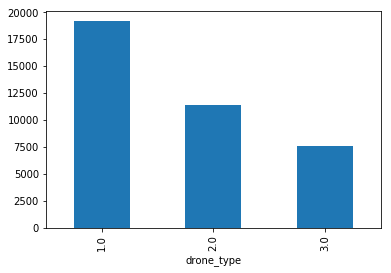

In [6]:
# histogram groupby drone type
# Series.nunique(dropna=True): Return number of unique elements in the object.
speed_df.groupby('drone_type')['speed'].nunique().plot(kind='bar')
plt.show()

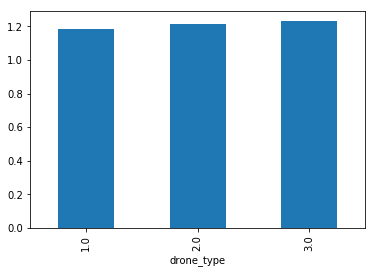

In [7]:
speed_df.groupby('drone_type')['speed'].mean().plot(kind='bar')
plt.show()
# find that type3 is the fastest one; 2 is the second fast; 1 is slowest

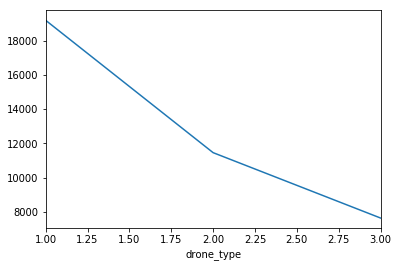

In [8]:
# linear groupby drone type
speed_df.groupby('drone_type')['speed'].nunique().plot(kind='line')
plt.show()

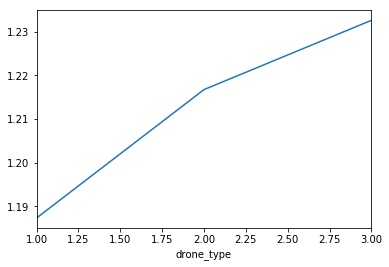

In [9]:
speed_df.groupby('drone_type')['speed'].mean().plot(kind='line')
plt.show()

In [10]:
type(speed_df.groupby('drone_type')['speed'])

pandas.core.groupby.SeriesGroupBy

In [11]:
speed_df.isnull().sum()

drone_type          10
journey_distance     0
travel_time         40
speed               40
dtype: int64